In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_preprocessed_normalised.csv')

In [3]:
df.head()

Times Pregnant  Plasma Glucose Concentration   BMI  Age  Outcome
0               6                           148  33.6   50        1
1               1                            85  26.6   31        0
2               8                           183  23.3   32        1
3               1                            89  28.1   21        0
4               5                           116  25.6   30        0

In [4]:
df['Outcome'].value_counts()

0    439
1    200
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Times Pregnant', ylabel='Age'>

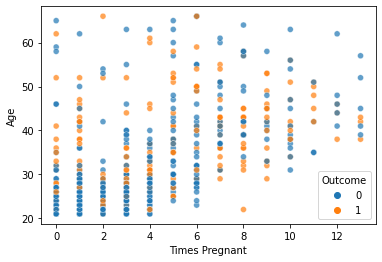

In [5]:
sns.scatterplot(x='Times Pregnant',y='Age',hue='Outcome',data=df,alpha=0.7)

<AxesSubplot:xlabel='Plasma Glucose Concentration', ylabel='BMI'>

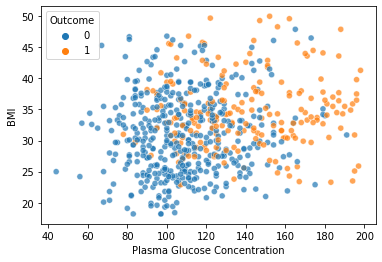

In [6]:
sns.scatterplot(x='Plasma Glucose Concentration',y='BMI',hue='Outcome',data=df,alpha=0.7)

<AxesSubplot:xlabel='Age', ylabel='Plasma Glucose Concentration'>

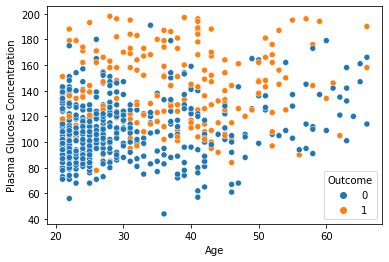

In [7]:
sns.scatterplot(x='Age',y='Plasma Glucose Concentration',hue='Outcome',data=df)
#plt.xlim(2,6)
#plt.ylim(3,10)
#plt.legend(loc=(1.1,0.5))

<AxesSubplot:xlabel='Age', ylabel='BMI'>

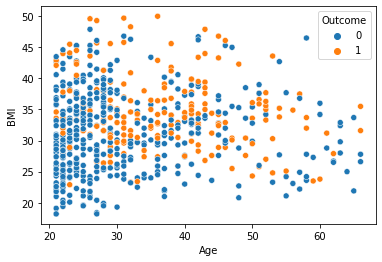

In [8]:
sns.scatterplot(x='Age',y='BMI',hue='Outcome',data=df)
#plt.xlim(2,6)
#plt.ylim(3,10)
#plt.legend(loc=(1.1,0.5))

Train|Test Split and Scaling Data

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [12]:
scaler = StandardScaler()

In [13]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
#testing with low k on purpose. This is generally a very bad idea since the 1st closest neighbor to each point is itself 
#so we will definitely overfit. It's equivalent to hardcoding labels for each row in the dataset.
knn_model = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

Model Evaluation

In [17]:
y_pred = knn_model.predict(scaled_X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [19]:
accuracy_score(y_test,y_pred)

0.71875

In [20]:
confusion_matrix(y_test,y_pred)

array([[86, 29],
       [16, 29]], dtype=int64)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       115
           1       0.50      0.64      0.56        45

    accuracy                           0.72       160
   macro avg       0.67      0.70      0.68       160
weighted avg       0.75      0.72      0.73       160



Thus with K=1 we achived f1 score of 56%, lets see if there are better values / ways to confirm that this is the best value

Elbow Method for Choosing Reasonable K Values

showing full 100 k values

In [22]:
test_error_rates = []
for k in range(1,100):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

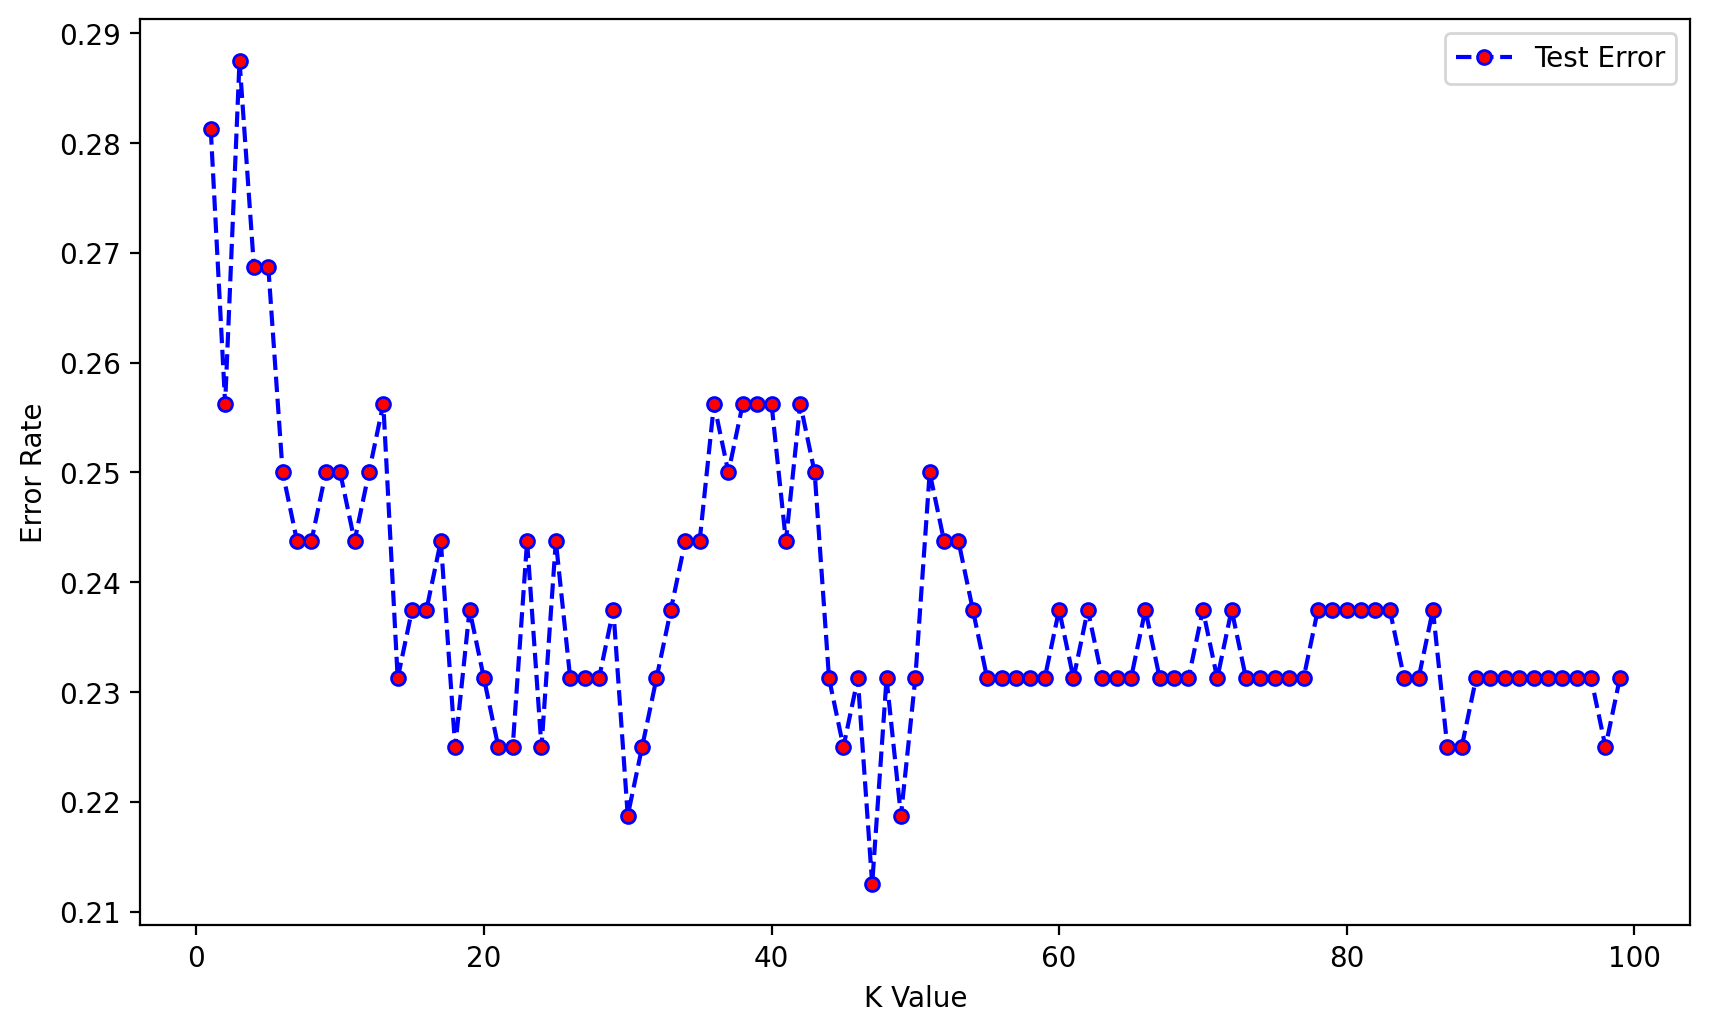

In [23]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,100),test_error_rates,label='Test Error',color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=5)
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.show()

In [24]:
print(test_error_rates)

[0.28125, 0.25625, 0.2875, 0.26875000000000004, 0.26875000000000004, 0.25, 0.24375000000000002, 0.24375000000000002, 0.25, 0.25, 0.24375000000000002, 0.25, 0.25625, 0.23124999999999996, 0.23750000000000004, 0.23750000000000004, 0.24375000000000002, 0.22499999999999998, 0.23750000000000004, 0.23124999999999996, 0.22499999999999998, 0.22499999999999998, 0.24375000000000002, 0.22499999999999998, 0.24375000000000002, 0.23124999999999996, 0.23124999999999996, 0.23124999999999996, 0.23750000000000004, 0.21875, 0.22499999999999998, 0.23124999999999996, 0.23750000000000004, 0.24375000000000002, 0.24375000000000002, 0.25625, 0.25, 0.25625, 0.25625, 0.25625, 0.24375000000000002, 0.25625, 0.25, 0.23124999999999996, 0.22499999999999998, 0.23124999999999996, 0.21250000000000002, 0.23124999999999996, 0.21875, 0.23124999999999996, 0.25, 0.24375000000000002, 0.24375000000000002, 0.23750000000000004, 0.23124999999999996, 0.23124999999999996, 0.23124999999999996, 0.23124999999999996, 0.23124999999999996

close up on lowest variance k value

In [25]:
test_error_rates = []
for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,20),test_error_rates,label='Test Error',color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=5)
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.show()

In [26]:
print(test_error_rates)

[0.28125, 0.25625, 0.2875, 0.26875000000000004, 0.26875000000000004, 0.25, 0.24375000000000002, 0.24375000000000002, 0.25, 0.25, 0.24375000000000002, 0.25, 0.25625, 0.23124999999999996, 0.23750000000000004, 0.23750000000000004, 0.24375000000000002, 0.22499999999999998, 0.23750000000000004]


 Thus, after k=6, there is a lot of variance in data, which will cause inaccuracies, 

Selecting k=6,

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(scaled_X_train,y_train)
y_pred = knn_model.predict(scaled_X_test)

In [28]:
accuracy_score(y_test,y_pred)

0.75

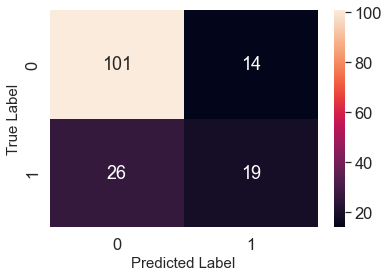

In [29]:
cm = confusion_matrix(y_test,y_pred)
sns.set(color_codes =True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15) # y-axis label with fontsize 15
plt.show()

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       115
           1       0.58      0.42      0.49        45

    accuracy                           0.75       160
   macro avg       0.69      0.65      0.66       160
weighted avg       0.73      0.75      0.74       160



However the f1 score decreased, thus it is not a good k-val

Searching with full cross validation grid search on optimal k value

In [31]:
scaler = StandardScaler()

In [32]:
knn = KNeighborsClassifier()

In [33]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [34]:
operations = [('scaler',scaler),('knn',knn)]

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
pipe = Pipeline(operations)

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
k_values = list(range(1,50))

In [39]:
k_values

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [40]:
param_grid = {'knn__n_neighbors': k_values}

In [41]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [42]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='accuracy')

In [43]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=13))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=13),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 13,
 'knn__p': 2,
 'knn__weights': 'uniform'}

This presents yet another good k val 13

Checking how many runs we did:

In [44]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [45]:
len(k_values)

49

In [46]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.72221491, 0.73690789, 0.78067982, 0.78072368, 0.77649123,
       0.77649123, 0.78072368, 0.77234649, 0.78692982, 0.77649123,
       0.78486842, 0.77241228, 0.79118421, 0.78070175, 0.78699561,
       0.77236842, 0.77239035, 0.77447368, 0.77236842, 0.78282895,
       0.78491228, 0.77864035, 0.78076754, 0.77447368, 0.77657895,
       0.78074561, 0.78076754, 0.78282895, 0.78076754, 0.78076754,
       0.77866228, 0.78493421, 0.77657895, 0.78493421, 0.78285088,
       0.78076754, 0.77866228, 0.78074561, 0.77657895, 0.77657895,
       0.78074561, 0.78076754, 0.77449561, 0.78074561, 0.77449561,
       0.77657895, 0.77241228, 0.77866228, 0.78074561])

In [47]:
len(full_cv_classifier.cv_results_['mean_test_score'])

49

scuffed methods to find best K value

Based on ROC_ACC score

In [48]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [49]:
Data = {}
K_val = []
Accuracy_score=[]
for  i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    y_pred = knn.predict(scaled_X_test)
    K_val.append(i)
    Accuracy_score.append( sklearn.metrics.roc_auc_score(y_test,y_pred) )
    Data.update({'K':K_val})
    Data.update({'ROC_ACC':Accuracy_score})
    FinalData = pd.DataFrame(Data)
    FinalData.sort_values('ROC_ACC',ascending=False,inplace=True,ignore_index=True)
FinalData.head(10)

K   ROC_ACC
0   1  0.696135
1  21  0.694686
2  30  0.692271
3  47  0.689855
4  31  0.687923
5  15  0.685990
6  28  0.683575
7  27  0.683575
8  20  0.683575
9  11  0.681643

This confirms again that k=1 is the prefered score

Based on best accuracy with regards to test and train score

In [50]:
##https://www.kaggle.com/code/kursatkaragoz29/pima-indians-diabetes-db-to-classification
from sklearn.neighbors import KNeighborsClassifier
train_score_list=[]
test_score_list=[]

for each in range (1,100):
    knn=KNeighborsClassifier(n_neighbors=each)
    knn.fit(scaled_X_train,y_train)
    test_score_list.append(knn.score(scaled_X_test,y_test)*100)
    train_score_list.append(knn.score(scaled_X_train,y_train)*100)

    
print("Best accuracy(test) is {:.3f} % with K = {}".format(np.max(test_score_list),test_score_list.index(np.max(test_score_list))+ 1))
print("Best accuracy(train) is {:.3f}% with K = {}".format(np.max(train_score_list),train_score_list.index(np.max(train_score_list))+1))

Best accuracy(test) is 78.750 % with K = 47
Best accuracy(train) is 100.000% with K = 1


In [51]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

arange=np.arange(1,31)
trace1=go.Scatter(
    x=arange,
    y=train_score_list,
    mode="lines + markers",
    name="Train_Score",
    marker=dict(color = 'rgba(16, 112, 2, 0.8)'),
    
)
trace2=go.Scatter(
    x=arange,
    y=test_score_list,
    mode="lines + markers",
    name="Test_Score",
    marker=dict(color = 'rgba(80, 26, 80, 0.8)'),
)
data=[trace1,trace2]
layout = dict(title = '-value VS Accuracy',
              xaxis= dict(title= 'K Value',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Score',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

This confirms again that k=1 is the prefered score

Lets use the ROC Curve to identify if the k value is decent

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

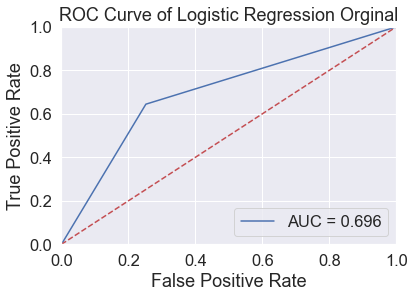

In [53]:
#original method
knn=KNeighborsClassifier(1)
knn.fit(scaled_X_train,y_train)
y_test_predict=knn.predict_proba(scaled_X_test)
fpr,tpr,threshold = roc_curve(y_test,y_test_predict[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression Orginal')
plt.show()

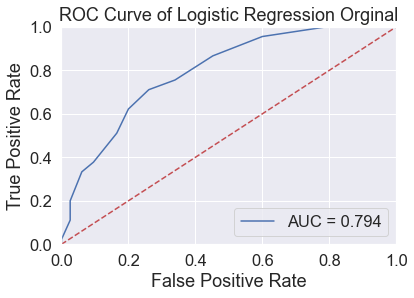

In [54]:
#original method
knn=KNeighborsClassifier(13)
knn.fit(scaled_X_train,y_train)
y_test_predict=knn.predict_proba(scaled_X_test)
fpr,tpr,threshold = roc_curve(y_test,y_test_predict[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression Orginal')
plt.show()

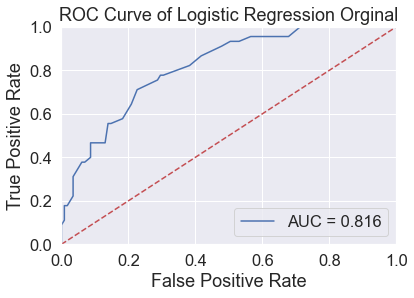

In [55]:
#original method
knn=KNeighborsClassifier(47)
knn.fit(scaled_X_train,y_train)
y_test_predict=knn.predict_proba(scaled_X_test)
fpr,tpr,threshold = roc_curve(y_test,y_test_predict[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression Orginal')
plt.show()

As the AUC value is close to 1, it is indeed a good K-value

Testing accuracy:

In [56]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train,y_train)
y_pred = knn_model.predict(scaled_X_test)

In [57]:
accuracy_score(y_test,y_pred)

0.71875

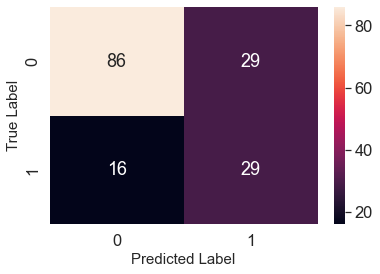

In [58]:
cm = confusion_matrix(y_test,y_pred)
sns.set(color_codes =True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15) # y-axis label with fontsize 15
plt.show()

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       115
           1       0.50      0.64      0.56        45

    accuracy                           0.72       160
   macro avg       0.67      0.70      0.68       160
weighted avg       0.75      0.72      0.73       160



Thus, for this dataset, the best K value is 1

In [60]:
knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(scaled_X_train,y_train)
y_pred = knn_model.predict(scaled_X_test)

In [61]:
accuracy_score(y_test,y_pred)

0.74375

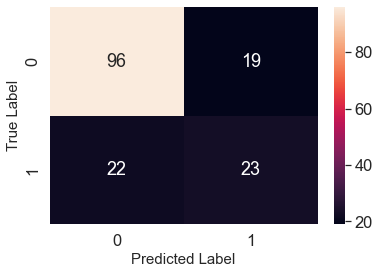

In [62]:
cm = confusion_matrix(y_test,y_pred)
sns.set(color_codes =True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15) # y-axis label with fontsize 15
plt.show()

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       115
           1       0.55      0.51      0.53        45

    accuracy                           0.74       160
   macro avg       0.68      0.67      0.68       160
weighted avg       0.74      0.74      0.74       160



In [64]:
knn_model = KNeighborsClassifier(n_neighbors=47)
knn_model.fit(scaled_X_train,y_train)
y_pred = knn_model.predict(scaled_X_test)

In [65]:
accuracy_score(y_test,y_pred)

0.7875

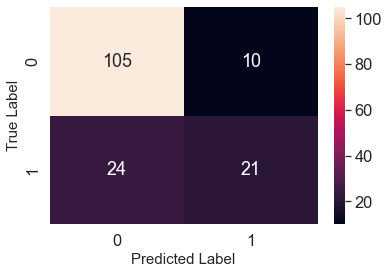

In [66]:
cm = confusion_matrix(y_test,y_pred)
sns.set(color_codes =True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15) # y-axis label with fontsize 15
plt.show()

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       115
           1       0.68      0.47      0.55        45

    accuracy                           0.79       160
   macro avg       0.75      0.69      0.71       160
weighted avg       0.78      0.79      0.77       160



Thus, 47 is the k-val as its roc and predict score is the best

Testing Cross val score

In [68]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=47)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.78125    0.7265625  0.75       0.7734375  0.81102362]
cv_scores mean:0.7684547244094488


It has a decent cross val score, making it a reliable model

Final Model:

In [69]:
scaler = StandardScaler()
knn47 = KNeighborsClassifier(n_neighbors=47)
operations = [('scaler',scaler),('knn47',knn47)]

In [70]:
pipe = Pipeline(operations)

In [71]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn47', KNeighborsClassifier(n_neighbors=47))])

In [72]:
pipe_pred = pipe.predict(X_test)

In [73]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       115
           1       0.68      0.47      0.55        45

    accuracy                           0.79       160
   macro avg       0.75      0.69      0.71       160
weighted avg       0.78      0.79      0.77       160



In [74]:
single_sample = X_test.iloc[40]

In [75]:
single_sample

Times Pregnant                   10.0
Plasma Glucose Concentration    179.0
BMI                              35.1
Age                              37.0
Name: 269, dtype: float64

In [76]:
pipe.predict(single_sample.values.reshape(1, -1))

C:\Users\windb\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([1], dtype=int64)

In [77]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

C:\Users\windb\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[0.25531915, 0.74468085]])

Testing prediction accuracy

In [78]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=47)
knn.fit(scaled_X_train, y_train)
y_pred2 = knn.predict(scaled_X_test)
print(accuracy_score(y_test, y_pred2))

0.7875


Save data to gui

In [80]:
import pickle
knn_model = pickle.dump(knn47, open('knn.h5', 'wb'))